In [1]:
!pip install wget
!pip install urllib3

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=08838fe80d59d6130d9e6560abfcc7ad249768840179c67a56927b8a8a9f40d2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import call
from scipy.stats.distributions import gamma,lognorm
import json 
import wget
import os
import os.path
from datetime import datetime
import pytz 
from collections import OrderedDict
from google.colab import drive
import math

from datetime import datetime,timedelta
from urllib.request import urlopen
import collections
import copy
#os.chdir('/content/gdrive/My Drive')
#drive.mount('/content/gdrive')

In [4]:
if os.path.exists("test.json"):
  os.remove("test.json")
wget.download('https://api.covid19india.org/v4/data-all.json', os.path.join(os.getcwd(),"test.json"))

'/content/test.json'

In [7]:
#New

def convert(dat): 
    return datetime.strptime(dat, '%Y-%m-%d').strftime('%d %B')

In [8]:
convert('2020-08-09')

'09 August'

In [9]:
dataset=pd.read_csv('https://raw.githubusercontent.com/CovidToday/backend/master/population_districts.csv')

In [10]:
d={}
for i in dataset['State_Code'].unique():
    d[i] = [dataset['District'][j] for j in dataset[dataset['State_Code']==i].index]

In [11]:
#dataset=pd.read_csv('population_districts.csv')
population=pd.DataFrame()
population["District"]=dataset['District']
population["Population"]=dataset['Population']
population = population.set_index('District')
population

,Population
District,
Ahmedabad,7214225
Anantapur,4081148
Aurangabad,3701282
Bengaluru Urban,9621551
Chengalpattu,2556423
Chennai,4646732
Chittoor,4174064
East Godavari,5154296
Faridabad,1809733


In [172]:
state_id = d
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-31",end=x)
dates=[]
for i in range(len(dd)):
  dates.append((str(dd[i])[:10]))
#dates
dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(dates[w]))

In [121]:
{
  "MH":["Mumbai", "Thane", "Pune", "Palghar", "Aurangabad"],
  "TN":["Chennai", "Chengalpattu"],
  "KA":["Bengaluru Urban"],
  "GJ":["Ahmedabad", "Surat"],
  "WB":["Kolkata"],
  "HR":["Gurugram"],
  "TG":["Hyderabad"],
}

{'GJ': ['Ahmedabad', 'Surat'],
 'HR': ['Gurugram'],
 'KA': ['Bengaluru Urban'],
 'MH': ['Mumbai', 'Thane', 'Pune', 'Palghar', 'Aurangabad'],
 'TG': ['Hyderabad'],
 'TN': ['Chennai', 'Chengalpattu'],
 'WB': ['Kolkata']}

In [122]:
'''
from datetime import timedelta
start=datetime.now()
x1=datetime.now(pytz.timezone('Asia/Kolkata')).date()
#x1 = datetime.today()
#y1 = timedelta(days=7)
y1=[]
x1=str(x1)[:10]
for i in range(7,0,-1):
  y1.append(str(datetime.today()-timedelta(days=i))[:10])
#print(y1)
##y1=str(y1)[:10]
t=y1
t
'''
#New
def dates_gen(periods=7):
  t = pd.Series(pd.date_range(end = datetime.now(pytz.timezone('Asia/Kolkata'))-timedelta(1), periods = periods)).dt.strftime('%Y-%m-%d').tolist()

  return t

In [123]:
t = dates_gen()

#Positivity Rate (All metrics)

##From ground zero

In [201]:
start=datetime.now()
states={}
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

#New
csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []

test=json.load(open('test.json'))


for j in state_id.keys():
  for k in state_id[j]:
    #print('Working : ',k)
    
    test_per_million = ['']*len(dates)
    pos_cum = ['']*len(dates)
    pos_rate_cum = ['']*len(dates)
    daily_pos = ['']*len(dates)
    daily_pos_ma = ['']*len(dates)
    daily_tested = ['']*len(dates)
    daily_pos_rate = ['']*len(dates)
    daily_pos_rate_ma = ['']*len(dates)
    tested_cum = ['']*len(dates)
    tested_daily = ['']*len(dates)
    deceased_cum = ['']*len(dates)
    daily_deceased = ['']*len(dates)
    recovered_cum = ['']*len(dates)
    daily_recovered = ['']*len(dates)

    #New
    daily_case_per_million = ['']*len(dates)
    daily_test_per_million = ['']*len(dates)
    daily_test_ma = ['']*len(dates)
    daily_deceased_ma = ['']*len(dates)
    
    for i in range(len(dates)):
      '''
      if i  == len(dates)//4:
        print("Progress : 25%")
      if i  == len(dates)//2:
        print("Progress : 50%")
      if i  == (len(dates)*3)//4:
        print("Progress : 75%")  
      if i  == len(dates)-1:
        print("Progres : 100&")
      '''
      if dates[i] in test.keys():
          temp=test[dates[i]] #New
          #temp=json.load(open('test.json'))[dates[i]] #(Major imporvement like 180x !!)
          if j in temp.keys():
            
            if 'districts' in temp[j].keys():
          
              if k in temp[j]['districts']:
               
                if 'total' in temp[j]['districts'][k].keys():
                  
                  if 'confirmed' in temp[j]['districts'][k]['total'].keys():
                  
                    pos_cum[i]=temp[j]['districts'][k]['total']['confirmed']

                  if 'tested' in temp[j]['districts'][k]['total'].keys():
                    tested_cum[i]=abs(temp[j]['districts'][k]['total']['tested'])
                    test_per_million[i]=temp[j]['districts'][k]['total']['tested']*1000000/int(population["Population"][k])
                      
                  if 'deceased' in temp[j]['districts'][k]['total'].keys():
                    deceased_cum[i]=temp[j]['districts'][k]['total']['deceased']
                  
                  if 'recovered' in temp[j]['districts'][k]['total'].keys():
                    recovered_cum[i]=temp[j]['districts'][k]['total']['recovered']
                  
                  if len(str(pos_cum[i])) and len(str(tested_cum[i])):
                    pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]


                if 'delta' in temp[j]['districts'][k].keys():
                  if 'confirmed' in temp[j]['districts'][k]['delta'].keys():
                    daily_pos[i]=temp[j]['districts'][k]['delta']['confirmed']
                    try:
                      daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New
                    except:
                      daily_case_per_million[i]= ''
                  if 'tested' in temp[j]['districts'][k]['delta'].keys():
                    daily_tested[i]=abs(temp[j]['districts'][k]['delta']['tested'])
                    try:
                      daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New
                    except:
                      daily_test_per_million[i] = ''
                  if 'deceased' in temp[j]['districts'][k]['delta'].keys():
                    daily_deceased[i]=temp[j]['districts'][k]['delta']['deceased']
                  
                  if 'recovered' in temp[j]['districts'][k]['delta'].keys():
                    daily_recovered[i]=temp[j]['districts'][k]['delta']['recovered']
                  
                  if len(str(daily_pos[i])) and len(str(daily_tested[i])):
                    daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

        #print(pos_cum,k)

    for w in range(7,len(daily_pos)):
                  sum1=0
                  sum2=0
                  for s in range(7):
                    if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
                      sum1+=int(daily_pos[w-s])
                      sum2+=int(daily_tested[w-s])
                  if (sum2!=0):
                    daily_pos_rate_ma[w]=sum1*100/abs(sum2)
                
    for w in range(7,len(daily_pos)):
                  sum1=0
                  count=0
                  for s in range(7):
                    if (len(str(daily_pos[w-s]))!=0):
                      sum1+=int(daily_pos[w-s])
                      count+=1
                  if count!=0:
                    daily_pos_ma[w]=sum1/count

    #New
    for w in range(7,len(daily_tested)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_tested[w-s]))!=0):
          sum1+=int(daily_tested[w-s])
        
          count+=1
      if count!=0:
        daily_test_ma[w]=sum1/count
        
    #New
    for w in range(7,len(daily_deceased)):
      sum1=0
      count=0
      for s in range(7):
        if (len(str(daily_deceased[w-s]))!=0):
          sum1+=int(daily_deceased[w-s])
          count+=1
      if count!=0:
        daily_deceased_ma[w]=sum1/count



    print(daily_pos_rate[-15:],k)

    for i in range(len(dates)):
                  csv_dates.append(dates1[i])
                  csv_states.append(k)
                  csv_total_cases.append(pos_cum[i])
                  csv_positivity_rate_cumulative.append(pos_rate_cum[i])
                  csv_daily_positive_cases.append(daily_pos[i])
                  csv_cum_recovered.append(recovered_cum[i])
                  csv_daily_recovered.append(daily_recovered[i])
                  csv_cum_deceased.append(deceased_cum[i])
                  csv_daily_deceased.append(daily_deceased[i])
                  csv_daily_positivity_rate.append(daily_pos_rate[i])
                  csv_daily_positive_cases_ma.append(daily_pos_ma[i])
                  csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
                  csv_daily_tested.append(daily_tested[i])
                  csv_cum_tested.append(tested_cum[i])
                  csv_test_per_million.append(test_per_million[i])

                  #New
                  csv_daily_case_per_million.append(daily_case_per_million[i])
                  csv_daily_test_per_million.append(daily_test_per_million[i])
                  csv_daily_test_ma.append(daily_test_ma[i])
                  csv_daily_deceased_ma.append(daily_deceased_ma[i])
      
    states[k]={
                                  'dates':dates1[:-1],
                                  'cum_positive_cases':pos_cum[:-1],
                                  'cum_positivity_rate':pos_rate_cum[:-1],
                                  'daily_positive_cases':daily_pos[:-1],
                                  'cum_recovered':recovered_cum[:-1],
                                  'daily_recovered':daily_recovered[:-1],
                                  'cum_deceased':deceased_cum[:-1],
                                  'daily_deceased':daily_deceased[:-1],
                                  'daily_positivity_rate':daily_pos_rate[:-1],
                                  'daily_positive_cases_ma': daily_pos_ma[:-1],
                                  'daily_positivity_rate_ma':daily_pos_rate_ma[:-1] , 
                                  'daily_tests': daily_tested[:-1],
                                  'cum_tests': tested_cum[:-1],
                                  'test_per_million':test_per_million[:-1],

                                  #New
                                  'daily_cases_per_million':daily_case_per_million[:-1],
                                  'daily_tests_per_million':daily_test_per_million[:-1],
                                  'daily_tests_ma':daily_test_ma[:-1],
                                  'daily_deceased_ma':daily_deceased_ma[:-1]

                            }
end=datetime.now()
print(end-start)

[1.4607368812802382, 1.5468447881877307, 1.3524779990736453, 1.446435237028742, 1.696057508704931, 1.6411026493617935, 1.5158647961585539, 1.5441251661724102, 1.5199682098152196, 1.6511652210262306, 1.3550615534496502, 1.343784994400896, 1.1964584828906437, '', ''] Ahmedabad
[6.034290803829882, 6.183322447202264, 5.89293747188484, 5.948795180722891, 6.944818304172275, 4.472435195326762, 4.629810509865208, 4.314720812182741, 3.2430155833216343, 3.955890075266935, 3.2767527675276753, 4.746580852775543, 4.621108282749168, '', ''] Surat
[12.03178206583428, '', 8.755724598307848, 20.214928841126923, 21.24860646599777, 15.075662760268518, 22.867513611615244, 19.05088230255268, '', 10.99470541849724, 24.85515643105446, 20.977393617021278, 17.79881217520416, '', ''] Anantapur
[8.22426886411375, '', 11.444766039556198, 19.7072924552107, 9.489916963226571, 10.60483870967742, 15.843669553007254, 14.597834493426141, 18.911617136240835, 19.122319301032565, 18.949720670391063, 14.354210368594545, 16

##Append Method

In [159]:
csv_dates=[]
csv_states=[]
csv_total_cases=[]
csv_cum_recovered=[]
csv_daily_recovered=[]
csv_cum_deceased=[]
csv_daily_deceased=[]
csv_positivity_rate_cumulative=[]
csv_daily_positive_cases=[]
csv_daily_positivity_rate=[]
csv_daily_positive_cases_ma=[]
csv_daily_positivity_rate_ma=[]
csv_test_per_million=[]
csv_daily_tested=[]
csv_cum_tested=[]

#New
csv_daily_case_per_million = []
csv_daily_test_per_million = []
csv_daily_test_ma = []
csv_daily_deceased_ma = []

temp1 = json.load(open('positivity_Rate_dist.json'))
test_json = json.load(open('test.json'))

for x in t:
  temp = test_json[x]
  
  states={}
  for j in state_id.keys():
    for k in state_id[j]:
    
      test_per_million = temp1[k]['test_per_million']
      pos_cum = temp1[k]['cum_positive_cases']
      pos_rate_cum = temp1[k]['cum_positivity_rate']
      daily_pos = temp1[k]['daily_positive_cases']
      daily_pos_ma = temp1[k]['daily_positive_cases_ma']
      daily_pos_rate = temp1[k]['daily_positivity_rate']
      daily_pos_rate_ma = temp1[k]['daily_positivity_rate_ma']
      tested_cum = temp1[k]['cum_tests']
      daily_tested = temp1[k]['daily_tests']
      deceased_cum = temp1[k]['cum_deceased']
      daily_deceased = temp1[k]['daily_deceased']
      recovered_cum = temp1[k]['cum_recovered']
      daily_recovered = temp1[k]['daily_recovered'] 

      dates=temp1[k]['dates']
      if convert(x) not in dates :
        print(1)
        dates.append(convert(x))
        test_per_million.append('')
        pos_cum.append('')
        pos_rate_cum.append('')
        daily_pos.append('')
        daily_pos_ma.append('')
        daily_pos_rate.append('')
        daily_pos_rate_ma.append('')
        tested_cum.append('')
        daily_tested.append('')
        deceased_cum.append('')
        daily_deceased.append('')
        recovered_cum.append('')
        daily_recovered.append('')
        i=len(dates)-1

      for l in range(len(dates)):
        if convert(x)==dates[l]:
          i=l
          break
      
      if dates[i] in test.keys():
          temp=test[dates[i]] #New
          # Previoustemp=json.load(open('test.json'))[dates[i]]
          if j in temp.keys():
            if 'districts' in temp[j].keys():
              if k in temp1.keys():
                  if 'total' in temp[j]['districts'][k].keys():
                    if 'confirmed' in temp[j]['districts'][k]['total'].keys():
                      pos_cum[i]=temp[j]['districts'][k]['total']['confirmed']

                    if 'tested' in temp[j]['districts'][k]['total'].keys():
                      tested_cum[i]=abs(temp[j]['districts'][k]['total']['tested'])
                      test_per_million[i]=temp[j]['districts'][k]['total']['tested']*1000000/int(population["Population"][k])
                        
                    if 'deceased' in temp[j]['districts'][k]['total'].keys():
                      deceased_cum[i]=temp[j]['districts'][k]['total']['deceased']
                    
                    if 'recovered' in temp[j]['districts'][k]['total'].keys():
                      recovered_cum[i]=temp[j]['districts'][k]['total']['recovered']
                    
                    if len(str(pos_cum[i])) and len(str(tested_cum[i])):
                      pos_rate_cum[i]= pos_cum[i]*100/tested_cum[i]

                  if 'delta' in temp[j].keys():
                    if 'confirmed' in temp[j]['districts'][k]['delta'].keys():
                      daily_pos[i]=temp[j]['districts'][k]['delta']['confirmed']
                      try:
                        daily_case_per_million[i] =temp[j]['delta']['confirmed']*1000000/int(population["Population"][k])   #New
                      except:
                        daily_case_per_million[i]= ''

                    if 'tested' in temp[j]['districts'][k]['delta'].keys():
                      daily_tested[i]=abs(temp[j]['districts'][k]['delta']['tested'])
                      try:
                        daily_test_per_million[i] = temp[j]['delta']['tested']*1000000/int(population["Population"][k])    #New
                      except:
                        daily_test_per_million[i] = ''

                    if 'deceased' in temp[j]['districts'][k]['delta'].keys():
                      daily_deceased[i]=temp[j]['districts'][k]['delta']['deceased']
                    
                    if 'recovered' in temp[j]['districts'][k]['delta'].keys():
                      daily_recovered[i]=temp[j]['districts'][k]['delta']['recovered']
                    
                    if len(str(daily_pos[i])) and len(str(daily_tested[i])):
                      daily_pos_rate[i]=int(daily_pos[i])*100/int(daily_tested[i])

      for w in range(7,len(daily_pos)):
        sum1=0
        sum2=0
        for s in range(7):
          if (len(str(daily_pos[w-s]))!=0 and len(str(daily_tested[w-s]))!=0):
            sum1+=int(daily_pos[w-s])
            sum2+=int(daily_tested[w-s])
        if (sum2!=0):
          daily_pos_rate_ma[w]=sum1*100/abs(sum2)
      
      for w in range(7,len(daily_pos)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_pos[w-s]))!=0):
            sum1+=int(daily_pos[w-s])
            count+=1
        if count!=0:
          daily_pos_ma[w]=sum1/count

      #New
      for w in range(7,len(daily_tested)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_tested[w-s]))!=0):
            sum1+=int(daily_tested[w-s])
          
            count+=1
        if count!=0:
          daily_test_ma[w]=sum1/count
          
      #New
      for w in range(7,len(daily_deceased)):
        sum1=0
        count=0
        for s in range(7):
          if (len(str(daily_deceased[w-s]))!=0):
            sum1+=int(daily_deceased[w-s])
            count+=1
        if count!=0:
          daily_deceased_ma[w]=sum1/count


      st=k
      for i in range(len(dates)):
          
          csv_dates.append(dates[i])
          csv_states.append(st)
          csv_total_cases.append(pos_cum[i])
          csv_positivity_rate_cumulative.append(pos_rate_cum[i])
          csv_daily_positive_cases.append(daily_pos[i])
          csv_cum_recovered.append(recovered_cum[i])
          csv_daily_recovered.append(daily_recovered[i])
          csv_cum_deceased.append(deceased_cum[i])
          csv_daily_deceased.append(daily_deceased[i])
          csv_daily_positivity_rate.append(daily_pos_rate[i])
          csv_daily_positive_cases_ma.append(daily_pos_ma[i])
          csv_daily_positivity_rate_ma.append(daily_pos_rate_ma[i])
          csv_daily_tested.append(daily_tested[i])
          csv_cum_tested.append(tested_cum[i])
          csv_test_per_million.append(test_per_million[i])
          
          #New
          csv_daily_case_per_million.append(daily_case_per_million[i])
          csv_daily_test_per_million.append(daily_test_per_million[i])
          csv_daily_test_ma.append(daily_test_ma[i])
          csv_daily_deceased_ma.append(daily_deceased_ma[i])
      #print(st)
      
      states[st]={
                      'dates':dates,
                      'cum_positive_cases':pos_cum,
                      'cum_positivity_rate':pos_rate_cum,
                      'daily_positive_cases':daily_pos,
                      'cum_recovered':recovered_cum,
                      'daily_recovered':daily_recovered,
                      'cum_deceased':deceased_cum,
                      'daily_deceased':daily_deceased,
                      'daily_positivity_rate':daily_pos_rate,
                      'daily_positive_cases_ma': daily_pos_ma,
                      'daily_positivity_rate_ma':daily_pos_rate_ma , 
                      'daily_tests': daily_tested,
                      'cum_tests': tested_cum,
                      'test_per_million':test_per_million,   

                      #New
                      'daily_cases_per_million':daily_case_per_million,
                      'daily_tests_per_million':daily_test_per_million,
                      'daily_tests_ma':daily_test_ma,
                      'daily_deceased_ma':daily_deceased_ma 
                }

    

    states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
    with open('positivity_Rate_dist.json', 'w') as outfile:
      json.dump(states, outfile,indent=4)

In [160]:
states['datetime']=str(datetime.now(pytz.timezone('Asia/Kolkata')))
with open('positivity_Rate_dist.json', 'w') as outfile:
    json.dump(states, outfile,indent=4)

In [97]:
n_states=0
for i in state_id.values():
  for k in i:
    n_states+=1

n_dates = len(dates)

rows = n_states*n_dates

In [177]:
df=pd.DataFrame()

df['dates']=csv_dates[:rows]
df['state']=csv_states[:rows]
df['cum_positive_cases']=csv_total_cases[:rows]
df['cum_positivity_rate']=csv_positivity_rate_cumulative[:rows]
df['cum_recovered']=csv_cum_recovered[:rows]
df['daily_recovered']:csv_daily_recovered[:rows]
df['cum_deceased']=csv_cum_deceased[:rows]
df['daily_deceased']:daily_deceased[:rows]
df['daily_positive_cases']=csv_daily_positive_cases[:rows]
df['daily_positivity_rate']=csv_daily_positivity_rate[:rows]
df['daily_positive_cases_ma']=csv_daily_positive_cases_ma[:rows]
df['daily_positivity_rate_ma']=    csv_daily_positivity_rate_ma[:rows]
df['daily_tests']=csv_daily_tested[:rows]
df['cum_tested']=csv_cum_tested[:rows]
df['test_per_million']=csv_test_per_million[:rows]

#New
df['daily_cases_per_million'] = csv_daily_case_per_million[:rows]
df['daily_tests_per_million'] = csv_daily_test_per_million[:rows]
df['daily_tests_ma'] = csv_daily_test_ma[:rows]
df['daily_deceased_ma'] = csv_daily_deceased_ma[:rows]

df.to_csv('positivity_Rate_dist.csv',index=False)

In [168]:
df_to_concat = copy.deepcopy(df)

In [169]:
data_recovered = pd.DataFrame()
districts=[]
data_deceased = pd.DataFrame()
data_confirmed = pd.DataFrame()
for s in state_id.keys():
    st=state_id[s]
    districts+=st
    print(st)
    for k in st:
      data_confirmed[k] = np.array(states[k]['daily_positive_cases'])
      data_deceased[k] = np.array(states[k]['daily_deceased'])
      data_recovered[k] = np.array(states[k]['daily_recovered'])

['Ahmedabad', 'Surat']
['Anantapur', 'Chittoor', 'East Godavari', 'Guntur', 'Kurnool', 'West Godavari']
['Aurangabad', 'Jalgaon', 'Mumbai', 'Nashik', 'Palghar', 'Pune', 'Raigad', 'Solapur', 'Thane']
['Bengaluru Urban']
['Chengalpattu', 'Chennai', 'Kancheepuram', 'Madurai', 'Thiruvallur', 'Tiruvannamalai', 'Vellore']
['Faridabad', 'Gurugram']
['Ganjam']
['Gautam Buddha Nagar', 'Ghaziabad']
['Hyderabad', 'Medchal Malkajgiri', 'Ranga Reddy']
['Kamrup Metropolitan']
['Kolkata', 'North 24 Parganas']


#CFR

In [178]:
def n2z(x):
    x[np.logical_or(np.isnan(x),np.isinf(x))] = 0
    return x

In [179]:
dates=dates[1:]

In [180]:
data_recovered = data_recovered.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_recovered = data_recovered.astype(np.int32)
data_confirmed = data_confirmed.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_confirmed = data_confirmed.astype(np.int32)
data_deceased = data_deceased.replace(r'^\s*$', np.NaN, regex=True).fillna(0)
data_deceased = data_deceased.astype(np.int32)
data_deceased['date'] = dates
data_recovered['date'] = dates
data_confirmed['date'] = dates

cfr() -- Working :  Ahmedabad
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Surat


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in true_divide


Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Anantapur
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Chittoor
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  East Godavari
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Guntur
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Kurnool
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  West Godavari
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Aurangabad
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Jalgaon
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Mumbai
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Nashik
Progress : 25%
Progress : 50%
Progress : 75%
Progress : 100%
cfr() -- Working :  Palghar
Progre

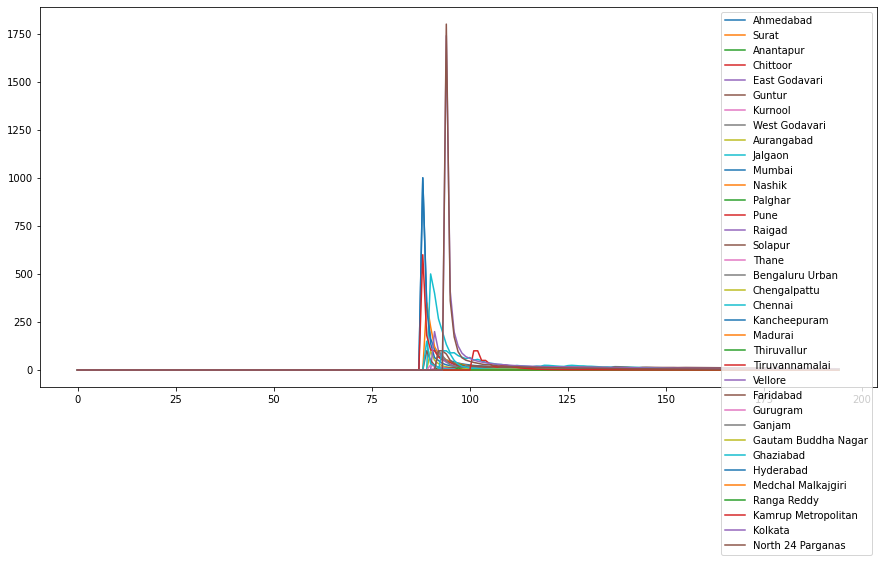

In [183]:
json_data={}
cfr = pd.DataFrame()
final=pd.DataFrame()
plt.figure(1, figsize=(15, 7))
for st in districts:
    print("cfr() -- Working : ",st)
    
    state=st
    boots = 100
    conf = []
    for n in range(boots):
        #print("Iteration: ",n+1,end='\r')
        if n  == boots//4:
          print("Progress : 25%")
        if n  == boots//2:
          print("Progress : 50%")
        if n  == (boots*3)//4:
          print("Progress : 75%")  
        if n  == boots-1:
          print("Progress : 100%")

        dataset = np.copy(data_confirmed[state].values)
        mean = 13.0+(20.9-8.7)/4*np.random.normal()
        sd = 12.7+(26.0-6.4)/4*np.random.normal()
        phi = np.sqrt(sd**2 + mean**2)
        mu = np.log(mean**2/phi)
        sigma = np.sqrt(np.log(phi**2/mean**2))
        L = lognorm(s=sigma,scale=np.exp(mu))
        for i in range(len(dataset)-1,-1,-1):
            send_forward = np.round(L.rvs(np.max([dataset[i],0])))
            send_forward = send_forward[i+send_forward<len(dataset)]
            dataset[i] = 0
            for j in np.unique(np.int32(send_forward)):
                dataset[i+j] += np.sum(send_forward==j)
        conf.append(dataset)
    CFR = np.cumsum(data_deceased[state].values)/np.cumsum(conf,axis=1)
    col_mean = np.nanmean(CFR, axis=0)
    inds = np.where(np.isnan(CFR))
    CFR[inds] = np.take(col_mean, inds[1])
    #temp1=list(pd.Series(dates).dt.strftime('%m-%d-%Y'))
    #print(temp1[0])
    temp={}
    temp = {
        'dates':dates1[1:],
        'cfr1_point':list(n2z(100*np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))),
        'cfr2_point':list(n2z(100*np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))),
        'cfr3_point':list(n2z(100*np.median(CFR,axis=0))),
        'cfr3_l95':list(n2z(100*np.quantile(CFR,0.025,axis=0))),
        'cfr3_u95':list(n2z(100*np.quantile(CFR,0.975,axis=0))),
        'cfr3_l50':list(n2z(100*np.quantile(CFR,0.25,axis=0))),
        'cfr3_u50':list(n2z(100*np.quantile(CFR,0.75,axis=0))),
        }
    a=st
    #print(a)
    states[state].update(temp)
    json_data[state] = temp
    cfr_state=pd.DataFrame()
    cfr_state['state']=[str(a)]*(len(dates))
    cfr_state['dates']=dates1[1:]
    cfr_state['cfr1_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/np.cumsum(data_confirmed[state].values))))
    cfr_state['cfr2_point']=(list(100*n2z(np.cumsum(data_deceased[state].values)/(np.cumsum(data_deceased[state].values)+np.cumsum(data_recovered[state].values)))))
    cfr_state['cfr3_point']=(list(100*n2z(np.median(CFR,axis=0))))
    cfr_state['cfr3_l95']=(list(100*n2z(np.quantile(CFR,0.025,axis=0))))
    cfr_state['cfr3_u95']=(list(100*n2z(np.quantile(CFR,0.975,axis=0))))
    cfr_state['cfr3_l50']=(list(100*n2z(np.quantile(CFR,0.25,axis=0))))
    cfr_state['cfr3_u50']=(list(100*n2z(np.quantile(CFR,0.75,axis=0))))
    cfr=pd.concat([cfr, cfr_state])
      
    plt.plot(temp['cfr3_point'],label=state)
plt.legend()

In [184]:
%cd /content

/content


In [185]:
cfr.to_csv('cfr_district.csv',index=False)
from datetime import datetime
json_data['datetime']=str(datetime.now())

In [186]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("cfr_district.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [187]:
def calc_doublingtimes(x):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1,x.shape[0]):
            if len(str(x[j])) and len(str(x[i])):
                vals.append(np.log(2)*(j-i)/np.log(int(x[j])/int(x[i])))
    return np.mean(vals),np.mean(vals)-1.96*np.std(vals),np.mean(vals)+1.96*np.std(vals)

In [188]:
start=datetime.now()
x=datetime.now(pytz.timezone('Asia/Kolkata')).date()
dd=pd.date_range(start="2020-01-31",end=x)
datess=[]
for i in range(len(dd)):
  datess.append((str(dd[i])[:10]))

In [ ]:
'''dates1=[]
for w in range (len(dates)):
  if len(dates[w]):
    dates1.append(convert(datess[w]))'''

'dates1=[]\nfor w in range (len(dates)):\n  if len(dates[w]):\n    dates1.append(convert(datess[w]))'

In [ ]:
stt=states

In [196]:
json_data={}
test=json.load(open('test.json'))
for j in state_id.keys():
    cumul=['']*len(dates)
    #st=state_id[j]
    for st in state_id[j]:
        #print(st)
        cumul=states[st]['cum_positive_cases']
        cumul_cases=np.array(cumul)
        dbt = np.zeros((3,cumul_cases.shape[0]))
        for i in range(cumul_cases.shape[0]):
            dbt[:,i] = calc_doublingtimes(cumul_cases[i-7:i])
        #st=state_id[j]
        #temp={}
        temp1 = {'dates':dates1,'dbt_point':pd.Series((list(dbt[0,:]))).fillna('').tolist(),'dbt_l95':pd.Series((list(dbt[1,:]))).fillna('').tolist(),'dbt_u95':pd.Series((list(dbt[2,:]))).fillna('').tolist()}
        states[st].update(temp1)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid

In [197]:
len(states['Mumbai']['dates'])-1

195

# RT

In [ ]:
rt = pd.DataFrame()
# plt.figure(1, figsize=(15, 7))
for j in state_id.keys():
  for st in state_id[j]:
    state=st
    temp = pd.DataFrame()
    temp["active"] = data_confirmed[state]
    temp.to_csv('confirmed.csv')
    call(['RScript.exe','scripts/boot_rt_back.R'])
    values = {
            'rt_point':[],
            'rt_sd':[],
            'rt_l95':[],
            'rt_u95':[],
            'rt_l50':[],
            'rt_u50':[],
            't_end':[]
            }
    for df in [pd.read_csv('rt_temp/'+temp) for temp in os.listdir('rt_temp/')]:
        values['rt_point'].append(df['Mean(R)'])
        values['rt_sd'].append(df['Std(R)'])
        values['rt_l95'].append(df['Quantile.0.025(R)'])
        values['rt_u95'].append(df['Quantile.0.975(R)'])
        values['rt_l50'].append(df['Quantile.0.25(R)'])
        values['rt_u50'].append(df['Quantile.0.75(R)'])
        values['t_end'].append(df['t_end']-1)
    for i in values:
        values[i] = np.median(values[i],axis=0)
    values['dates'] = list(data_confirmed['date'][values['t_end']-1])
    rt_state=pd.DataFrame()
    rt_state['state']=[str(state)]*len(values['dates'])
    rt_state['dates']= values['dates']
    rt_state['rt_point'] = values['rt_point']
    rt_state['rt_sd'] = values['rt_sd']    
    rt_state['rt_l95'] = values['rt_l95']    
    rt_state['rt_u95'] = values['rt_u95']    
    rt_state['rt_l50'] = values['rt_l50']
    rt_state['rt_u50'] = values['rt_u50']
    rt=pd.concat([rt, rt_state])
  
    plt.plot(range(len(values['rt_point'])),values['rt_point'],label=state)
    plt.fill_between(range(len(values['rt_point'])),values['rt_l95'],values['rt_u95'],alpha=0.5)
    plt.ylim(0,4)
    plt.legend()
    plt.show()

## Rt shifting

In [ ]:
def shift_rt_metrics(dict,key,days=9):
  values_shifted = collections.deque(dict[key])
  values_shifted.rotate(-9)

  new_val = list(values_shifted)

  size = len(dict['dates'])
  
  for i in range(days):
    new_val[size-1-i]=''

  return new_val
 

In [ ]:
#!wget https://github.com/CovidToday/backend/blob/master/population_districts.csv

--2020-08-10 16:01:52--  https://github.com/CovidToday/backend/blob/master/population_districts.csv
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘population_districts.csv’

population_district     [ <=>                ]  87.18K  --.-KB/s    in 0.01s   

2020-08-10 16:01:53 (7.92 MB/s) - ‘population_districts.csv’ saved [89277]



In [ ]:
values_shifted = copy.deepcopy(values)
values_shifted['rt_point'] = shift_rt_metrics(values_shifted,'rt_point')
values_shifted['rt_sd'] = shift_rt_metrics(values_shifted,'rt_sd')
values_shifted['rt_l95'] = shift_rt_metrics(values_shifted,'rt_195')
values_shifted['rt_u95'] = shift_rt_metrics(values_shifted,'rt_u96')
values_shifted['rt_l50'] = shift_rt_metrics(values_shifted,'rt_150')
values_shifted['rt_u50'] = shift_rt_metrics(values_shifted,'rt_u50')
values_shifted['t_end'] = shift_rt_metrics(values_shifted,'t_end')

## Rt changes for review

In [ ]:
print('Last 15 days : ',values_shifted['rt_point'][-15:])
print('Last 15 days : ',values_shifted['u95'][-15:])
print('Last 15 days : ',values_shifted['rt_l95'][-15:])

In [ ]:
with open('rt_shifted.json', 'w') as outfile:
  json.dump(values_shifted, outfile,indent=4)

In [ ]:
rt.to.csv('rt.csv',index=False)

with open('rt.json', 'w') as outfile:
  json.dump(values, outfile,indent=4)

In [ ]:
df_list = [df,cfr,rt]
all_dataframes = pd.concat(df_list)
all_dataframes.to_csv('complete_districts_all_metrics.csv',index=False)

#Complete

In [190]:
cols=list(states['Mumbai'].keys())
q=['state']
complete=pd.DataFrame(columns=q+cols)
keys=list(states.keys())[:-1]
for i in keys:
  temp=pd.DataFrame()
  t=len(states['Mumbai']['dates'])-1
  temp['state']=[str(i)]*t
  for j in cols:
    print(i,j)
    temp[j]=list(states[i][j])[:t]
  complete = pd.concat([complete,temp])

Ahmedabad dates
Ahmedabad cum_positive_cases
Ahmedabad cum_positivity_rate
Ahmedabad daily_positive_cases
Ahmedabad cum_recovered
Ahmedabad daily_recovered
Ahmedabad cum_deceased
Ahmedabad daily_deceased
Ahmedabad daily_positivity_rate
Ahmedabad daily_positive_cases_ma
Ahmedabad daily_positivity_rate_ma
Ahmedabad daily_tests
Ahmedabad cum_tests
Ahmedabad test_per_million
Ahmedabad daily_cases_per_million
Ahmedabad daily_tests_per_million
Ahmedabad daily_tests_ma
Ahmedabad daily_deceased_ma
Ahmedabad cfr1_point
Ahmedabad cfr2_point
Ahmedabad cfr3_point
Ahmedabad cfr3_l95
Ahmedabad cfr3_u95
Ahmedabad cfr3_l50
Ahmedabad cfr3_u50
Ahmedabad dbt_point
Ahmedabad dbt_l95
Ahmedabad dbt_u95
Surat dates
Surat cum_positive_cases
Surat cum_positivity_rate
Surat daily_positive_cases
Surat cum_recovered
Surat daily_recovered
Surat cum_deceased
Surat daily_deceased
Surat daily_positivity_rate
Surat daily_positive_cases_ma
Surat daily_positivity_rate_ma
Surat daily_tests
Surat cum_tests
Surat test_per_

In [198]:
complete.to_csv('complete_districts.csv',index=False)

In [199]:
json_data_indented = json.dumps(json_data, indent = 4)
with open("doubling_rate_dist.json", "w") as outfile: 
    outfile.write(json_data_indented)

In [200]:
states_indented = json.dumps(states, indent = 4)
with open("covidtoday_dist.json", "w") as outfile: 
    outfile.write(states_indented)